# Imports

In [2]:
%matplotlib inline

import numpy as np
import model_flux_ratio as mfr

from astropy.table import Table
from matplotlib import pyplot as plt

# Hydrogen C/R(lambda); assuming missing factor of 1e4

## xi, waves, temp

In [3]:
waves = np.array([4102.891, 4341.684, 4862.721, 6564.612])
temp = np.arange(10000, 25000)
xi = 1e-4 # xi*10^4 = 1; log(xi) = -2
xi2 = 1   # xi*10^4 = 4; log(xi) = 0

print (xi, xi2)

0.0001 1


In [4]:
pg = mfr.hydrogen_collision_to_recomb(xi, waves[1], temp) * np.exp( (-13.6*(-19/150)) / (8.6173303e-5*temp) )
h8 = mfr.hydrogen_collision_to_recomb(xi, waves[1], temp) * np.exp((-13.6 * ((1/5**2) - (1/8**2))) / (8.6173303e-5 * temp))
hd = mfr.hydrogen_collision_to_recomb(xi, waves[0], temp)
hg = mfr.hydrogen_collision_to_recomb(xi, waves[1], temp)
hb = mfr.hydrogen_collision_to_recomb(xi, waves[2], temp)
ha = mfr.hydrogen_collision_to_recomb(xi, waves[3], temp)

pg2 = mfr.hydrogen_collision_to_recomb(xi2, waves[1], temp) * np.exp( (-13.6*(-19/150)) / (8.6173303e-5*temp) )
h82 = mfr.hydrogen_collision_to_recomb(xi2, waves[1], temp) * np.exp((-13.6 * ((1/5**2) - (1/8**2))) / (8.6173303e-5 * temp))
hd2 = mfr.hydrogen_collision_to_recomb(xi2, waves[0], temp)
hg2 = mfr.hydrogen_collision_to_recomb(xi2, waves[1], temp)
hb2 = mfr.hydrogen_collision_to_recomb(xi2, waves[2], temp)
ha2 = mfr.hydrogen_collision_to_recomb(xi2, waves[3], temp)

### xi = 1e-4

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not co

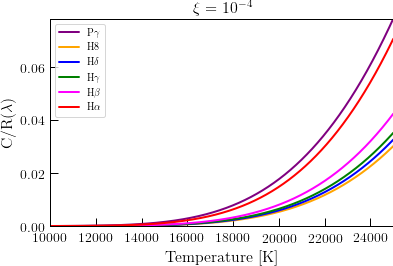

In [5]:
plt.plot(temp, pg, color='purple', label=r'P$\gamma$')
plt.plot(temp, h8, color='orange', label='H8')
plt.plot(temp, hd, color='blue', label=r'H$\delta$')
plt.plot(temp, hg, color='green', label=r'H$\gamma$')
plt.plot(temp, hb, color='magenta', label=r'H$\beta$')
plt.plot(temp, ha, color='red', label=r'H$\alpha$')
plt.xlabel('Temperature [K]')
plt.ylabel(r'C/R($\lambda$)')
plt.title(r'$\xi=10^{-4}$')
plt.legend()
#plt.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/CR.pdf')
plt.show()

### xi = 1

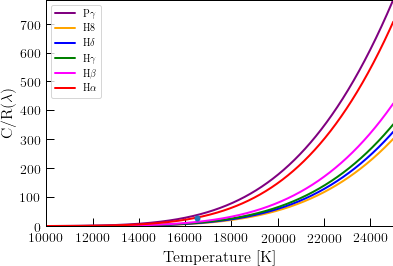

In [6]:
plt.plot(temp, pg2, color='purple', label=r'P$\gamma$')
plt.plot(temp, h82, color='orange', label='H8')
plt.plot(temp, hd2, color='blue', label=r'H$\delta$')
plt.plot(temp, hg2, color='green', label=r'H$\gamma$')
plt.plot(temp, hb2, color='magenta', label=r'H$\beta$')
plt.plot(temp, ha2, color='red', label=r'H$\alpha$')
plt.plot(16500, mfr.hydrogen_collision_to_recomb(xi2, waves[3], 16500), 'o')
#plt.ylim(-0.01, 0.08)
plt.xlabel('Temperature [K]')
plt.ylabel(r'C/R($\lambda$)')
plt.legend()
plt.show()

# Testing C/R, scaled for H8 and Pgamma

In [7]:
hydrogen_lines = np.array([10941.082, 6564.612, 4862.721, 4341.684, 4102.891, 3890.166])
hydrogen_CR_coeff = Table.read('/Users/thsyu/Software/Yp/tables/hydrogen_CR_coeff', format='ascii', delimiter='\t')

In [8]:
def hydrogen_collision_to_recomb(xi, wave, temp, method='AOS2010'):
    '''
    Calculate the factor that corrects the
    measured hydrogen flux for emission due
    to collisional excitation of neutral
    hydrogen

    Assumes that at these densities
    and temperatures, all neutral hydrogen is
    excited from the ground state

    Uses collision strengths from Anderson
    et al. 2002 and branching ratios from
    Omidvar 1983. Recombination rates are
    from Hummer & Storey 1987.

    Parameters
    ----------
    xi : float
        n(HI)/n(HII); ratio of neutral hydrogen
        to ionized hydrogen densities
    wave : float
        Wavelength of the Balmer line (in Angstroms)
    temp : float
        Temperature of the gas (in Kelvin)
    method : string (optional)
        Method of calculating the C/R ratio;
        options include
        AOS2010:
            - collision strength: Anderson et al. 2002
            - branching ratio: ????
            - recombination rate: Hummer & Storey 1987
        R2015:
            - collision strength: Chianti database
            - recombination rate: Seaton 1959a
        A2002:
            - collision strength: Anderson et al. 2002
            - branching ratio: Omidvar 1983
            - recombination rate: Hummer & Storey 1987
    Returns
    -------
    hydrogen_CR : float
        Relative amount of collisional to
        recombination emission for a given
        hydrogen line:
        C/R(wavelength) = eta*K_eff/alpha_eff
    '''
    # Boltzmann's constant
    kB = 8.61733e-5
    # Redefine the temperature
    T4 = temp / 10000.

    # Identify hydrogen line of interest
    idx = np.where(np.abs(hydrogen_lines - wave) < 3.5)[0][0]

    if method == 'AOS2010':
        if idx == 1:
            line = str('Ha')
        elif idx == 2:
            line = str('Hb')
        elif idx == 3:
            line = str('Hg')
        elif idx == 4:
            line = str('Hd')
        elif idx == 5:
            line = ('H8')
        #    print ('Hydrogen C/R for', line)

        rows = np.where(line == hydrogen_CR_coeff['Line'])[0]

        # Calculate the total K_eff/alpha_eff for relevant energy levels -- collisional sum includes an infinite
        # number of levels, but probabilities fall off quickly. This sum excludes terms contributing < 1%
        Keff_alphaeff = 0.
        for i in range(1, 9):  # 1-9 here is to grab the 'Term1', 'Term2', etc. column names
            a, b, c = hydrogen_CR_coeff['Term ' + str(i)][rows]
            Keff_alphaeff += (a * np.exp(b / T4) * (T4 ** c))

        # Amount of collisional to recombination emission; from Equation 6.1 of AOS 2010
        hydrogen_CR = Keff_alphaeff * xi * 1e4

    elif method == 'A2002':
        print ('Using A+2002 collision strengths, O1983 branching ratios, HS1987 recombination rates')
        grid_temp = np.array([5000., 7500., 10000., 12500., 15000., 20000., 30000.])
        recomb_42 = np.array([5.380e-14, 3.863e-14, 3.022e-14, 2.482e-14, 2.105e-14, 1.610e-14,
                              1.087e-14])  # Recombination rate for 4-->2 transition
        Pg_scale = np.array([9.87e-2, 9.39e-2, 9.04e-2, 8.77e-2, 8.56e-2, 8.23e-2, 7.79e-2])

        if idx == 0: # Pgamma
            scale = np.array([4.58e-1, 4.65e-1, 4.68e-01, 4.71e-1, 4.73e-1, 4.75e-1, 4.78e-1])
            i = np.array([5, 5, 5, 5, 5])
            # Hgamma: 1-->5s, 1-->5p, 1-->5d, 1-->5f 1-->5g
            # 1-->11, 1-->12, 1-->13, 1-->14, 1-->15
            Ediff_factor = np.exp((-13.6 * (-19 / 150)) / (8.6173303e-5 * temp))
            upsilon = np.array([1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
            branching_ratio = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
        if idx == 1:  # Halpha
            # Recombination rate scaling factors, which is given for the 4-->2 transition
            scale = np.array([3.04, 2.93, 2.86, 2.82, 2.70, 2.75, 2.70])
            i = np.array([3, 3, 3, 4, 4, 4, 4])
            # Halpha: 1-->3s, 1-->3p, 1-->3d, 1-->4s, 1-->4p, 1-->4d, 1-->4f
            # In A2000's definition of i and j, these correspond to: 1-->4, 1-->5, 1-->6, 1-->7, 1-->8, 1-->9, 1-->10
            Ediff_factor = 1.
            upsilon = np.array([6.96e-2, 1.26e-1, 6.58e-2, 2.55e-2, 4.79e-2, 3.19e-2, 1.14e-2])
            # Branching Ratios from Table 2 of Omidvar 1983
            branching_ratio = np.array(
                [1.0, 1.0, 1.0, 4.16e-1, 4.2e-2, 2.54e-1, 1.0])  # last 4 are from 40,41,42,43 --> 3
        elif idx == 2:  # Hbeta
            scale = np.array([1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00])
            i = np.array([4, 4, 4, 4, 5, 5, 5, 5, 5])
            # Hbeta: 1-->4s, 1-->4p, 1-->4d, 1-->4f, 1-->5s, 1-->5p, 1-->5d, 1-->5f 1-->5g
            # 1-->7, 1-->8, 1-->9, 1-->10, 1-->11, 1-->12, 1-->13, 1-->14, 1-->15
            Ediff_factor = 1.
            upsilon = np.array([2.55e-2, 4.79e-2, 3.19e-2, 1.14e-2, 1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
            branching_ratio = np.array(
                [1.0, 1.0, 1.0, 1.0, 2.27e-1, 2.20e-2, 1.07e-1, 3.63e-1, 1.0])  # last 5 are from 50,51,52,53,54 --> 4
        elif idx == 3:  # Hgamma
            scale = np.array([4.58e-1, 4.65e-1, 4.68e-01, 4.71e-1, 4.73e-1, 4.75e-1, 4.78e-1])
            i = np.array([5, 5, 5, 5, 5])
            # Hgamma: 1-->5s, 1-->5p, 1-->5d, 1-->5f 1-->5g
            # 1-->11, 1-->12, 1-->13, 1-->14, 1-->15
            Ediff_factor = 1.
            upsilon = np.array([1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
            branching_ratio = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
        elif idx == 4:  # Hdelta
            scale = np.array([2.51e-1, 2.56e-1, 2.59e-1, 2.61e-1, 2.62e-1, 2.64e-1, 2.66e-1])
            i = np.array([5, 5, 5, 5, 5])
            Ediff_factor = np.exp((-13.6 * ((1 / 5 ** 2) - (1 / 6 ** 2))) / (kB * temp))  # Energy difference b/t Hg and Hd
            upsilon = np.array([1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
            branching_ratio = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
        elif idx == 5:  # H8
            scale = np.array([1.02e-1, 1.04e-1, 1.05e-1, 1.06e-1, 1.06e-1, 1.07e-1, 1.08e-1])
            i = np.array([5, 5, 5, 5, 5])
            Ediff_factor = np.exp((-13.6 * ((1 / 5 ** 2) - (1 / 8 ** 2))) / (kB * temp))  # Energy difference b/t Hg and H8
            upsilon = np.array([1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
            branching_ratio = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
        else:
            print ('Not ready for this hydrogen transition')

        grid_alpha = recomb_42 * scale
        coeff = np.polyfit(np.log10(grid_temp), np.log10(grid_alpha), 2)
        alpha = 10 ** np.polyval(coeff, np.log10(temp))

        K = 4.004e-8 * np.sqrt(1 / (kB * temp)) * np.exp(-13.6 * (1 - (1 / i ** 2)) / (kB * temp)) * upsilon
        numerator = K * branching_ratio
        hydrogen_CR = xi * Ediff_factor * np.sum(numerator) / alpha
        print (hydrogen_CR)

    elif method == 'R2015':
        print ('Using R+2015 formulations for collision strengths and recombination rates')
        if idx == 1:  # Halpha
            i = 3
            # Fits to collision strength from Table 1 of R+2015
            acoeffs = np.array([0.2500, 0.2461, 0.3297, 0.3892, -0.0928, 0.0071])
            # Fits for the recombination coefficients from Table 2 of R+2015
            bcoeffs = np.array([-13.3377, -0.7161, -0.1435, -0.0386, 0.0077])
            factor = 1.0
        elif idx == 2:  # Hbeta
            i = 4
            acoeffs = np.array([0.1125, 0.1370, -0.1152, 0.1209, -0.0276, 0.0020])
            bcoeffs = np.array([-13.5225, -0.7928, -0.1749, -0.0412, 0.0154])
            factor = 1.0
        elif idx == 3:  # Hgamma
            i = 5
            acoeffs = np.array([0.0773, 0.0678, -0.0945, 0.0796, -0.0177, 0.0013])
            bcoeffs = np.array([-13.6820, -0.8629, -0.1957, -0.0375, 0.0199])
            factor = 1.0
        elif idx == 4: # Hdelta
            i = 6
            acoeffs = np.array([0.0773, 0.0678, -0.0945, 0.0796, -0.0177, 0.0013])
            bcoeffs = np.array([-13.6820, -0.8629, -0.1957, -0.0375, 0.0199])
            factor = np.exp((-13.6 * ((1 / 5 ** 2) - (1 / 6 ** 2))) / (kB * temp))  # Energy difference b/t Hg and Hd
        else:
            print("Line not ready yet")
            pdb.set_trace()

        # Energy difference from ground state to collisionall excited state
        ediff = -13.6 * (1 - (1 / i ** 2))
        # Reparameterization of the temperature, defined after Eq. A11 of R+2015
        tval = np.log10(temp / 1.0E4)

        # Omega, the collision strength, calculated using Eq. A11 of R+2015
        omega1k = np.zeros(tval.size)

        for aa in range(acoeffs.size):
            omega1k += acoeffs[aa] * tval ** aa
        # Note 4.004E-8/np.sqrt(kB) = 0.5 * 8.629E-6  (i.e. Erik's Eq. 6.3 = Raga's Eq. A12, for the constant)
        q1k = 0.5 * 8.629E-6 * omega1k[0] * np.exp(ediff / (kB * temp)) / np.sqrt(temp)

        # Alpha, the recombination coefficient, calculated using Eq. A13 of R+2015
        alphak = np.zeros(tval.size)

        for aa in range(bcoeffs.size):
            alphak += bcoeffs[aa] * tval ** aa
        alphak = 10.0 ** (alphak[0])

        # C/R should be eta * q/alpha
        hydrogen_CR = factor * xi * q1k / alphak

    return hydrogen_CR

In [9]:
# H-delta, using scaling factor vs using Table data
print (hydrogen_collision_to_recomb(1e-2, hydrogen_lines[3], 18000) * np.exp((-13.6 * ((1/5**2) - (1/6**2))) / (8.6173303e-5 * 18000)))
print (hydrogen_collision_to_recomb(1e-2, hydrogen_lines[4], 18000))

0.23270866057204165
0.23308296874328974


In [10]:
# What are the correctional factors, given Eq. 6.4 from AOS2010?
print (np.exp((-13.6 * ((1/5**2) - (1/6**2))) / (8.6173303e-5 * 18000))) # H-delta
print (np.exp((-13.6 * ((1/5**2) - (1/8**2))) / (8.6173303e-5 * 18000))) # H8
print (np.exp((-13.6 * (((1/5**2) - (1/2**2)) - ((1/6**2)-(1/3**2)))) / (8.6173303e-5 * 18000))) # P-gamma

0.8983794521801567
0.8075772074333424
3.0361666389391893


In [42]:
# This is where Erik gets the Hdelta entry in Table 3
print (-15.15 + ( (-13.6 * ((1/5**2) - (1/6**2))) / (8.6173303e-5*1e4) ) )
# Could this be the H8 entry?
print (-15.15 + ( (-13.6 * ((1/5**2) - (1/8**2))) / (8.6173303e-5*1e4) ) )
# And the Pg entry?
print (-15.15 + ( (-13.6 * (-19/150)) / (8.6173303e-5*1e4) ) )

-15.342892945303747
-15.534689907963724
-13.150927657761168


In [12]:
# Does scaling C/R(Hd) from Hb or Ha work?
print (hydrogen_collision_to_recomb(1e-2, hydrogen_lines[2], 18000) * np.exp((-13.6 * ((1/4**2) - (1/6**2))) / (8.6173303e-5 * 18000)))
print (hydrogen_collision_to_recomb(1e-2, hydrogen_lines[1], 18000) * np.exp((-13.6 * ((1/3**2) - (1/6**2))) / (8.6173303e-5 * 18000)))

0.2393969552706724
0.3038872661769678


# Testing C/R from Anderson et al. 2002, Omidvar 1983, Hummer & Storey 1987

Effective collision strengths, Gamma, from Anderson et al. 2002: https://iopscience.iop.org/article/10.1088/0953-4075/35/6/701, a correction of Anderson et al. 2000: https://iopscience.iop.org/article/10.1088/0953-4075/33/6/311/pdf

Branching ratios from Omidvar 1983: https://www.sciencedirect.com/science/article/pii/0092640X83900116

Recombination rates from Hummer & Storey 1987:

In [13]:
kB = 8.61733e-5

In [14]:
def eV_to_K(eV):
    temp = eV * (1/kB)
    return temp

## H-alpha

j=3; i=3,4,5,6,...

In [15]:
electron_temp = np.array([0.5, 1.0, 3.0, 5.0, 10.0, 15.0, 20.0, 25.0])

print (eV_to_K(electron_temp))

[  5802.26125726  11604.52251451  34813.56754354  58022.61257257
 116045.22514514 174067.83771772 232090.45029029 290113.06286286]


Let's assume we are working at T=11604.52K to be consistent with Gamma values from Anderson et al. 2002 and avoid interpolations for now

In [16]:
T = eV_to_K(electron_temp[1])

print (T)

11604.522514514358


3s, 3p, 3d, 4s, 4p, 4d, 4f

In [17]:
# Effective collision strength, G_ij, from Table 1 of Anderson et al. 2002
# Halpha: 1-->3s, 1-->3p, 1-->3d, 1-->4s, 1-->4p, 1-->4d, 1-->4f
# In A2000's definition of i and j, these correspond to: 1-->4, 1-->5, 1-->6, 1-->7, 1-->8, 1-->9, 1-->10
G_Ha = np.array([6.96e-2, 1.26e-1, 6.58e-2, 2.55e-2, 4.79e-2, 3.19e-2, 1.14e-2])
# Hbeta: 1-->4s, 1-->4p, 1-->4d, 1-->4f, 1-->5s, 1-->5p, 1-->5d, 1-->5f 1-->5g
# 1-->7, 1-->8, 1-->9, 1-->10, 1-->11, 1-->12, 1-->13, 1-->14, 1-->15
G_Hb = np.array([2.55e-2, 4.79e-2, 3.19e-2, 1.14e-2, 1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
# Hgamma: 1-->5s, 1-->5p, 1-->5d, 1-->5f 1-->5g
# 1-->11, 1-->12, 1-->13, 1-->14, 1-->15
G_Hg = np.array([1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])

# Branching Ratios from Table 2 of Omidvar 1983
BR_Ha = np.array([1.0, 1.0, 1.0, 4.16e-1, 4.2e-2, 2.54e-1, 1.0]) # last 4 are from 40,41,42,43 --> 3 
BR_Hb = np.array([1.0, 1.0, 1.0, 1.0, 2.27e-1, 2.20e-2, 1.07e-1, 3.63e-1, 1.0]) # last 5 are from 50,51,52,53,54 --> 4
BR_Hg = np.array([1.0, 1.0, 1.0, 1.0, 1.0])

In [18]:
def calculate_CR(gamma, branching_ratio, temp, eta, line):
    kB = 8.61733e-5
    
    # From H&S 1987, T=10000K, n_e=100; 4-2 RC = 3.022e-14
    #### Eventually need to interpolate based on T, n_e
    recomb_42 = 3.022e-14

    if line == 'Ha':
        scale = 2.86
        i = np.array([3, 3, 3, 4, 4, 4, 4])
    elif line == 'Hb':
        scale = 1.00
        i = np.array([4, 4, 4, 4, 5, 5, 5, 5, 5])
    elif line == 'Hg':
        scale = 4.68e-1
        i = np.array([5, 5, 5, 5, 5])
    else:
        print ('Not ready for this hydrogen transition')
    
    K = 4.004e-8 * np.sqrt( 1/(kB*temp) ) * np.exp(-13.6*(1-(1/i**2))/(kB*temp)) * gamma
    numerator = K * branching_ratio
    CR = eta * np.sum(numerator) / (recomb_42*scale)
    
    return np.sum(K), recomb_42*scale, CR #K, alpha, C/R

In [19]:
print (calculate_CR(G_Ha, BR_Ha, T, 1e-2, 'Ha')[2])
print (calculate_CR(G_Hb, BR_Hb, T, 1e-2, 'Hb')[2])
print (calculate_CR(G_Hg, BR_Hg, T, 1e-2, 'Hg')[2])

0.007239619572034797
0.004893137741813825
0.005086816219927839


In [20]:
# Erik's C/R formulation 
print (hydrogen_collision_to_recomb(1e-2, hydrogen_lines[1], T)) # Halpha
print (hydrogen_collision_to_recomb(1e-2, hydrogen_lines[2], T)) # Hbeta
print (hydrogen_collision_to_recomb(1e-2, hydrogen_lines[3], T)) # Hgamma

0.006277165622439355
0.0024435993549477867
0.0017901827262200988


We are a bit off from Erik's C/R values using the Anderson et al. 2002 effective collision strengths (Gamma) + Omidvar 1983 branching ratios, and Hummer & Storey 1987 recombination rates. We assume a BR=1.0 for transitions between the same n level (i.e., 3s-->3, 3p-->3, 5d-->5, etc.)

# Testing C/R from Raga et al. 2015

In [21]:
def R2015(xi, temp, line):
    '''
    Calculate the ratio of collisional
    to recombination hydrogen emission
    using collision strength formulations
    and recombination rate formulations
    from Raga et al. 2015 (R+2015)
    '''
    kB = 8.61733e-5
    if line == 'Ha':
        i = 3
        # Fits to collision strength from Table 1 of R+2015
        acoeffs = np.array([0.2500, 0.2461, 0.3297, 0.3892, -0.0928, 0.0071])
        # Fits for the recombination coefficients from Table 2 of R+2015
        bcoeffs = np.array([-13.3377, -0.7161, -0.1435, -0.0386, 0.0077])
    elif line == 'Hb':
        i = 4
        acoeffs = np.array([0.1125, 0.1370, -0.1152, 0.1209, -0.0276, 0.0020])
        bcoeffs = np.array([-13.5225, -0.7928, -0.1749, -0.0412, 0.0154])
    elif line == 'Hg':
        i = 5
        acoeffs = np.array([0.0773, 0.0678, -0.0945, 0.0796, -0.0177, 0.0013])
        bcoeffs = np.array([-13.6820, -0.8629, -0.1957, -0.0375, 0.0199])
    else:
        print("Line not ready yet")
        
    # Energy difference from ground state to collisionall excited state
    ediff = -13.6 * (1 - (1 / i ** 2))
    # Reparameterization of the temperature, defined after Eq. A11 of R+2015
    tval = np.log10(temp/1.0E4)
    
    # Omega, the collision strength, calculated using Eq. A11 of R+2015    
    omega1k = np.zeros(tval.size)
    
    for aa in range(acoeffs.size):
        omega1k += acoeffs[aa] * tval**aa
    #print("Raga", omega1k)
    # Note 4.004E-8/np.sqrt(kB) = 0.5 * 8.629E-6  (i.e. Erik Eq. 6.3 = Raga Eq. A12 for the coefficient)
    q1k = 0.5 * 8.629E-6 * omega1k * np.exp(ediff/(kB*temp)) / np.sqrt(temp)
    
    # Alpha, the recombination coefficient, calculated using Eq. A13 of R+2015
    alphak = np.zeros(tval.size)
    
    
    for aa in range(bcoeffs.size):
        alphak += bcoeffs[aa] * tval**aa
    alphak = 10.0**(alphak)
    
    # C/R should be eta * q/alpha
    CR = xi * q1k/alphak
    
    return q1k, alphak, CR

# Test parameters

In [22]:
test_temps = np.linspace(1.0E4, 2.5E4, 1000)
test_xi = 1e-4

## Compare alpha, recombination rate, from H&S1987 vs R2015

In [475]:
alpha_mix_Ha = np.zeros(test_temps.size)
alpha_mix_Hb = np.zeros(test_temps.size)
alpha_mix_Hg = np.zeros(test_temps.size)

for t in range(test_temps.size):
    alpha_mix_Ha[t] = A2002_O1983_HS1987(test_xi, 6563, test_temps[t])[1]
    alpha_mix_Hb[t] = A2002_O1983_HS1987(test_xi, 4863, test_temps[t])[1]
    alpha_mix_Hg[t] = A2002_O1983_HS1987(test_xi, 4341, test_temps[t])[1]
    # Returns K, alpha, C/R

alpha_R2015_Ha = R2015(test_xi, test_temps, 'Ha')[1]
alpha_R2015_Hb = R2015(test_xi, test_temps, 'Hb')[1]
alpha_R2015_Hg = R2015(test_xi, test_temps, 'Hg')[1]
# Returns q, alpha, C/R

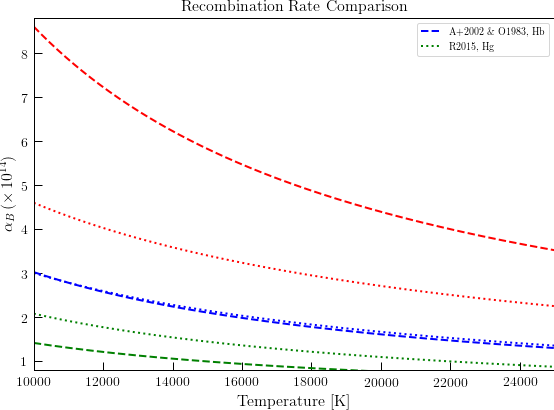

In [476]:
plt.subplots(figsize=(8,6))
plt.plot(test_temps, alpha_mix_Ha*1e14, color='red', ls='--', label='__nolabel__')
plt.plot(test_temps, alpha_mix_Hb*1e14, color='blue', ls='--', label='A+2002 \& O1983, Hb')
plt.plot(test_temps, alpha_mix_Hg*1e14, color='green', ls='--', label='__nolabel__')
plt.plot(test_temps, alpha_R2015_Ha*1e14, color='red', ls=':', label='__nolabel__')
plt.plot(test_temps, alpha_R2015_Hb*1e14, color='blue', ls=':', label='__nolabel__')
plt.plot(test_temps, alpha_R2015_Hg*1e14, color='green', ls=':', label=r'R2015, Hg')
plt.xlabel('Temperature [K]')
plt.ylim(0.8, 8.8)
plt.ylabel(r'$\alpha_{B}\,(\times\,10^{14}$)')
plt.title('Recombination Rate Comparison')
plt.legend()
#plt.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/recombination_rate_comparison.pdf')
plt.show()

## Compare 'K' from Anderson et al. 2002 vs 'q' from Raga et al. 2015

In [27]:
K_mix_Ha = np.zeros(test_temps.size)
K_mix_Hb = np.zeros(test_temps.size)
K_mix_Hg = np.zeros(test_temps.size)

for t in range(test_temps.size):
    K_mix_Ha[t] = calculate_CR(G_Ha, BR_Ha, test_temps[t], test_xi, 'Ha')[0]
    K_mix_Hb[t] = calculate_CR(G_Hb, BR_Hb, test_temps[t], test_xi, 'Hb')[0]
    K_mix_Hg[t] = calculate_CR(G_Hg, BR_Hg, test_temps[t], test_xi, 'Hg')[0]
    # Returns K, alpha, C/R

q_R2015_Ha = R2015(test_xi, test_temps, 'Ha')[0]
q_R2015_Hb = R2015(test_xi, test_temps, 'Hb')[0]
q_R2015_Hg = R2015(test_xi, test_temps, 'Hg')[0]
# Returns q, alpha, C/R

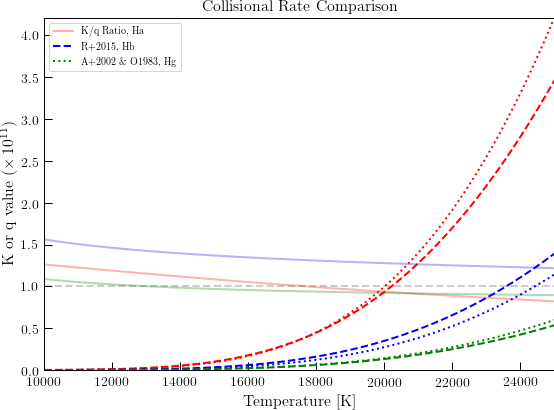

In [28]:
plt.subplots(figsize=(8,6))
plt.axhline(1.0, ls='--', alpha=0.2)
plt.plot(test_temps, K_mix_Ha/q_R2015_Ha, color='red', ls='-', alpha=0.3, label='K/q Ratio, Ha')
plt.plot(test_temps, K_mix_Hb/q_R2015_Hb, color='blue', ls='-', alpha=0.3, label='__nolabel__')
plt.plot(test_temps, K_mix_Hg/q_R2015_Hg, color='green', ls='-', alpha=0.3, label='__nolabel__')
plt.plot(test_temps, K_mix_Ha*1e11, color='red', ls='--', label='__nolabel__')
plt.plot(test_temps, K_mix_Hb*1e11, color='blue', ls='--', label='R+2015, Hb')
plt.plot(test_temps, K_mix_Hg*1e11, color='green', ls='--', label='__nolabel__')
plt.plot(test_temps, q_R2015_Ha*1e11, color='red', ls=':', label='__nolabel__')
plt.plot(test_temps, q_R2015_Hb*1e11, color='blue', ls=':', label='__nolabel__')
plt.plot(test_temps, q_R2015_Hg*1e11, color='green', ls=':', label=r'A+2002 \& O1983, Hg')
plt.legend()
plt.xlabel('Temperature [K]')
plt.ylabel(r'K or q value ($\times\,10^{11}$)')
plt.title('Collisional Rate Comparison')
#plt.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/collisional_rate_comparison.pdf')
plt.show()

## Compare C/R values from Erik, Raga et al. 2015, A2002+O1983+HS1987

### Anderson et al. 2002

In [29]:
CR_mix_Ha = np.zeros(test_temps.size)
CR_mix_Hb = np.zeros(test_temps.size)
CR_mix_Hg = np.zeros(test_temps.size)

for t in range(test_temps.size):
    CR_mix_Ha[t] = calculate_CR(G_Ha, BR_Ha, test_temps[t], test_xi, 'Ha')[2]
    CR_mix_Hb[t] = calculate_CR(G_Hb, BR_Hb, test_temps[t], test_xi, 'Hb')[2]
    CR_mix_Hg[t] = calculate_CR(G_Hg, BR_Hg, test_temps[t], test_xi, 'Hg')[2]

### Raga et al. 2015

In [31]:
CR_R2015_Ha = R2015(test_xi, test_temps, 'Ha')[2]
CR_R2015_Hb = R2015(test_xi, test_temps, 'Hb')[2]
CR_R2015_Hg = R2015(test_xi, test_temps, 'Hg')[2]
# Returns q, alpha, C/R
CR_R2015_Ha2 = R2015_v2(test_xi, test_temps, 'Ha')[2]

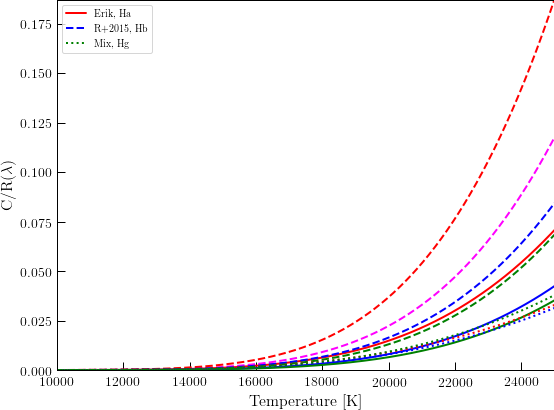

In [32]:
plt.subplots(figsize=(8,6))
plt.plot(temp, ha, color='red', label='Erik, Ha')
plt.plot(temp, hb, color='blue', label='__nolabel__')
plt.plot(temp, hg, color='green', label='__nolabel__')
plt.plot(test_temps, CR_R2015_Ha2, color='magenta', ls='--', label='__nolabel__')
plt.plot(test_temps, CR_R2015_Ha, color='red', ls='--', label='__nolabel__')
plt.plot(test_temps, CR_R2015_Hb, color='blue', ls='--', label='R+2015, Hb')
plt.plot(test_temps, CR_R2015_Hg, color='green', ls='--', label='__nolabel__')
plt.plot(test_temps, CR_mix_Ha, color='red', ls=':', label='__nolabel__')
plt.plot(test_temps, CR_mix_Hb, color='blue', ls=':', label='__nolabel__')
plt.plot(test_temps, CR_mix_Hg, color='green', ls=':', label='Mix, Hg')
plt.legend()
plt.xlabel('Temperature [K]')
plt.ylabel(r'C/R($\lambda$)')
plt.show()

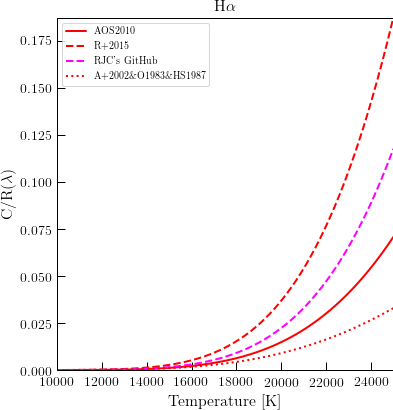

In [33]:
plt.subplots(figsize=(6,6))
plt.plot(temp, ha, color='red', label='AOS2010')
plt.plot(test_temps, CR_R2015_Ha, color='red', ls='--', label='R+2015')
plt.plot(test_temps, CR_R2015_Ha2, color='magenta', ls='--', label='RJC\'s GitHub')
plt.plot(test_temps, CR_mix_Ha, color='red', ls=':', label='A+2002\&O1983\&HS1987')
plt.legend()
plt.xlabel('Temperature [K]')
plt.ylabel(r'C/R($\lambda$)')
plt.title(r'H$\alpha$')
#plt.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/Ha_CR_comparison.pdf')
plt.show()

In [34]:
hg = mfr.hydrogen_collision_to_recomb(xi, waves[1], test_temps)
hb = mfr.hydrogen_collision_to_recomb(xi, waves[2], test_temps)
ha = mfr.hydrogen_collision_to_recomb(xi, waves[3], test_temps)

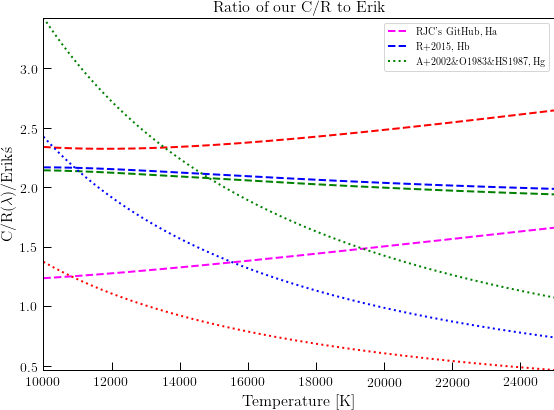

In [35]:
plt.subplots(figsize=(8,6))
plt.plot(test_temps, CR_R2015_Ha2/ha, color='magenta', ls='--', label='RJC\'s GitHub, Ha')
plt.plot(test_temps, CR_R2015_Ha/ha, color='red', ls='--', label='__nolabel__')
plt.plot(test_temps, CR_R2015_Hb/hb, color='blue', ls='--', label='R+2015, Hb')
plt.plot(test_temps, CR_R2015_Hg/hg, color='green', ls='--', label='__nolabel__')
plt.plot(test_temps, CR_mix_Ha/ha, color='red', ls=':', label='__nolabel__')
plt.plot(test_temps, CR_mix_Hb/hb, color='blue', ls=':', label='__nolabel__')
plt.plot(test_temps, CR_mix_Hg/hg, color='green', ls=':', label='A+2002\&O1983\&HS1987, Hg')
plt.legend()
plt.xlabel('Temperature [K]')
plt.ylabel(r'C/R($\lambda$)/Erik\'s')
plt.title('Ratio of our C/R to Erik')
#plt.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/CR_to_Erik_ratio.pdf')
plt.show()

# Testing my combined A2002, O1983, HS1987

In [261]:
def A2002_O1983_HS1987(xi, wave, temp):
    '''
    Calculate the factor that corrects the
    measured hydrogen flux for emission due
    to collisional excitation of neutral
    hydrogen

    Assumes that at these densities
    and temperatures, all neutral hydrogen is
    excited from the ground state

    Uses collision strengths from Anderson
    et al. 2002 and branching ratios from
    Omidvar 1983. Recombination rates are
    from Hummer & Storey 1987.

    Parameters
    ----------
    xi : float
        n(HI)/n(HII); ratio of neutral hydrogen
        to ionized hydrogen densities
    wave : float
        Wavelength of the Balmer line (in Angstroms)
    temp : float
        Temperature of the gas (in Kelvin)

    Returns
    -------
    hydrogen_CR : float
        Relative amount of collisional to
        recombination emission for a given
        Balmer line
        C/R(wavelength) = eta*K_eff/alpha_eff
    '''
    kB = 8.61733e-5
    
#hydrogen_lines = np.array([10941.082, 6564.612, 4862.721, 4341.684, 4102.891, 3890.166])

    idx = np.where(np.abs(hydrogen_lines - wave) < 3.5)[0][0]

    grid_temp = np.array([5000., 7500., 10000., 12500., 15000., 20000., 30000.])
    recomb_42 = np.array([5.380e-14, 3.863e-14, 3.022e-14, 2.482e-14, 2.105e-14, 1.610e-14, 1.087e-14])# Recombination rate for 4-->2 transition
    #Pg_scale = np.array([9.87e-2, 9.39e-2, 9.04e-2, 8.77e-2, 8.56e-2, 8.23e-2, 7.79e-2])

    if idx == 1: # Halpha
        # Recombination rate scaling factors, which is given for the 4-->2 transition, from HS1987
        scale = np.array([3.04, 2.93, 2.86, 2.82, 2.70, 2.75, 2.70])
        i = np.array([3, 3, 3, 4, 4, 4, 4])
        # Collision strengths, from Table 1 of A+2002
        # Halpha: 1-->3s, 1-->3p, 1-->3d, 1-->4s, 1-->4p, 1-->4d, 1-->4f
        # In A2000's definition of i and j, these correspond to: 1-->4, 1-->5, 1-->6, 1-->7, 1-->8, 1-->9, 1-->10
        Ediff_factor = 1.
        upsilon = np.array([6.96e-2, 1.26e-1, 6.58e-2, 2.55e-2, 4.79e-2, 3.19e-2, 1.14e-2])
        # Branching Ratios from Table 2 of Omidvar 1983
        branching_ratio = np.array([1.0, 1.0, 1.0, 4.16e-1, 4.2e-2, 2.54e-1, 1.0]) # last 4 are from 40,41,42,43 --> 3 
    elif idx == 2: # Hbeta
        scale = np.array([1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00])
        i = np.array([4, 4, 4, 4, 5, 5, 5, 5, 5])
        # Hbeta: 1-->4s, 1-->4p, 1-->4d, 1-->4f, 1-->5s, 1-->5p, 1-->5d, 1-->5f 1-->5g
        # 1-->7, 1-->8, 1-->9, 1-->10, 1-->11, 1-->12, 1-->13, 1-->14, 1-->15
        Ediff_factor = 1.
        upsilon = np.array([2.55e-2, 4.79e-2, 3.19e-2, 1.14e-2, 1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
        branching_ratio = np.array([1.0, 1.0, 1.0, 1.0, 2.27e-1, 2.20e-2, 1.07e-1, 3.63e-1, 1.0]) # last 5 are from 50,51,52,53,54 --> 4
    elif idx == 3: # Hgamma
        scale = np.array([4.58e-1, 4.65e-1, 4.68e-01, 4.71e-1, 4.73e-1, 4.75e-1, 4.78e-1])
        i = np.array([5, 5, 5, 5, 5])
        # Hgamma: 1-->5s, 1-->5p, 1-->5d, 1-->5f 1-->5g
        # 1-->11, 1-->12, 1-->13, 1-->14, 1-->15
        Ediff_factor = 1.
        upsilon = np.array([1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
        branching_ratio = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
    elif idx == 4: # Hdelta
        scale = np.array([4.58e-1, 4.65e-1, 4.68e-01, 4.71e-1, 4.73e-1, 4.75e-1, 4.78e-1])
        i = np.array([5, 5, 5, 5, 5])
        Ediff_factor = np.exp((-13.6 * ((1 / 5 ** 2) - (1 / 6 ** 2))) / (kB * temp)) # Energy difference b/t Hg and Hd
        upsilon = np.array([1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
        branching_ratio = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
    elif idx == 5: # H8
        scale = np.array([4.58e-1, 4.65e-1, 4.68e-01, 4.71e-1, 4.73e-1, 4.75e-1, 4.78e-1])
        i = np.array([5, 5, 5, 5, 5])
        Ediff_factor = np.exp((-13.6 * ((1 / 5 ** 2) - (1 / 8 ** 2))) / (kB * temp)) # Energy difference b/t Hg and H8
        upsilon = np.array([1.72e-2, 3.15e-2, 2.22e-2, 9.14e-3, 4.03e-3])
        branching_ratio = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
    else:
        print ('Not ready for this hydrogen transition')

    grid_alpha = recomb_42 * scale
    coeff = np.polyfit(np.log10(grid_temp), np.log10(grid_alpha), 2)
    alpha = 10**np.polyval(coeff, np.log10(temp))

    K = 4.004e-8 * np.sqrt( 1/(kB*temp) ) * np.exp(-13.6*(1-(1/i**2))/(kB*temp)) * upsilon
    numerator = K * branching_ratio
    hydrogen_CR = xi * Ediff_factor * np.sum(numerator) / alpha
    
    return numerator, alpha, hydrogen_CR

In [40]:
print (A2002_O1983_HS1987(1e-2, 6563, T))
print (A2002_O1983_HS1987(1e-2, 4863, T))
print (A2002_O1983_HS1987(1e-2, 4341, T))

0.008393683101778498
0.0055762354411603215
0.005770769687552217


In [41]:
print (calculate_CR(G_Ha, BR_Ha, T, 1e-2, 'Ha')[2])
print (calculate_CR(G_Hb, BR_Hb, T, 1e-2, 'Hb')[2])
print (calculate_CR(G_Hg, BR_Hg, T, 1e-2, 'Hg')[2])

0.007239619572034797
0.004893137741813825
0.005086816219927839


## Interpolating the Anderson et al. 2002 collision strengths

In [259]:
grid_temp_A2002 = np.array([5802.26125726, 11604.52251451, 34813.56754354, 58022.61257257, 116045.22514514, \
                            174067.83771772, 232090.45029029, 290113.06286286])

print (grid_temp_A2002)

[  5802.26125726  11604.52251451  34813.56754354  58022.61257257
 116045.22514514 174067.83771772 232090.45029029 290113.06286286]


In [177]:
upsilon_A2002 = Table.read('/Users/thsyu/Software/Yp/tables/hydrogen_collision_strength_A2002', format='ascii', delimiter=' ', header_start=0)

In [178]:
upsilon_A2002[3:8]

n',l',n,l,0.5,1.0,3.0,5.0,10.0,15.0,20.0,25.0
int64,str1,int64,str1,float64,float64,float64,float64,float64,float64,float64,float64
4,s,1,s,0.0223,0.0255,0.0319,0.034,0.0361,0.0376,0.039,0.0402
4,p,1,s,0.0402,0.0479,0.074,0.0946,0.133,0.161,0.184,0.204
4,d,1,s,0.03,0.0319,0.0404,0.0472,0.0569,0.0615,0.0641,0.0656
4,f,1,s,0.0123,0.0114,0.0105,0.0105,0.0106,0.0104,0.0101,0.0098
5,s,1,s,0.0145,0.0172,0.0192,0.0193,0.0194,0.0197,0.0202,0.0207


In [187]:
# Collision strengths at T=5802, 11604, 34813K
upsilon_3s1s = np.array([0.0651, 0.0696, 0.0776])
upsilon_3p1s = np.array([0.112, 0.126, 0.186])
upsilon_3d1s = np.array([0.0621, 0.0658, 0.0782])
upsilon_4s1s = np.array([0.0223, 0.0255, 0.0319])
upsilon_4p1s = np.array([0.0402, 0.0479, 0.074])
upsilon_4d1s = np.array([0.03, 0.0319, 0.0404])
upsilon_4f1s = np.array([0.0123, 0.0114, 0.0105])
upsilon_5s1s = np.array([0.0145, 0.0172, 0.0192])
upsilon_5p1s = np.array([0.0269, 0.0315, 0.0404])
upsilon_5d1s = np.array([0.0208, 0.0222, 0.0247])
upsilon_5f1s = np.array([0.00919, 0.00914, 0.00952])
upsilon_5g1s = np.array([0.00466, 0.00403, 0.00285])

In [229]:
# Resulting polyfit coefficients from fitting to the log10(temp) and above collision strengths
upsilon_3s1s_coeff = np.array([0.00233701, -0.00334599,  0.04458994]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_3s1s, 2)
upsilon_3p1s_coeff = np.array([0.10184036, -0.75072221,  1.49488154]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_3p1s, 2)
upsilon_3d1s_coeff = np.array([0.01760335, -0.12551182,  0.28513044]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_3d1s, 2)
upsilon_4s1s_coeff = np.array([0.00357721, -0.01737304,  0.03701513]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_4s1s, 2)
upsilon_4p1s_coeff = np.array([0.03742747, -0.26741176,  0.51648268]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_4p1s, 2)
upsilon_4d1s_coeff = np.array([0.01478313, -0.10941403,  0.23239221]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_4d1s, 2)
upsilon_4f1s_coeff = np.array([0.001418  , -0.0140902 ,  0.04524426]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_4f1s, 2)
upsilon_5s1s_coeff = np.array([-0.00613942,  0.05702998, -0.11317503]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_5s1s, 2)
upsilon_5p1s_coeff = np.array([0.00433421, -0.01864829,  0.03569204]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_5p1s, 2)
upsilon_5d1s_coeff = np.array([0.000757  , -0.00127525,  0.01487691]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_5d1s, 2)
upsilon_5f1s_coeff = np.array([0.00123696, -0.00984927,  0.02873762]) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_5f1s, 2)
upsilon_5g1s_coeff = np.array([-0.00048879,  0.00173353,  0.00505922] ) #np.polyfit(np.log10(grid_temp_A2002[0:3]), upsilon_5g1s, 2)

In [209]:
# Introduce a fine temperature grid to display the polyfit
fine_temp = np.linspace(5000, 35000)

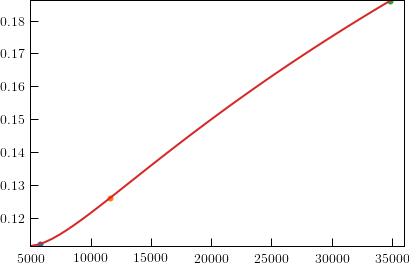

In [230]:
for i in range(upsilon_3s1s.size):
    plt.plot(grid_temp_A2002[i], upsilon_3p1s[i], 'o')
plt.plot(fine_temp, np.polyval(upsilon_3p1s_coeff, np.log10(fine_temp)))
plt.xlim(5000, 36000)
plt.show()

## Does a spline work better?

In [236]:
import scipy.interpolate as interp

In [244]:
test = interp.UnivariateSpline(grid_temp_A2002[0:3], upsilon_4s1s, k=2)

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


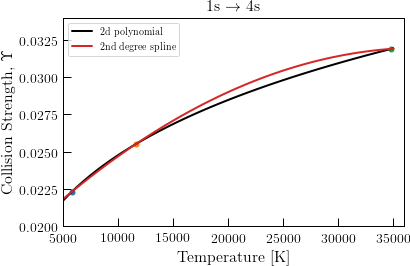

In [258]:
for i in range(upsilon_3s1s.size):
    plt.plot(grid_temp_A2002[i], upsilon_4s1s[i], 'o')
plt.plot(fine_temp, np.polyval(upsilon_4s1s_coeff, np.log10(fine_temp)), color='black', label='2d polynomial')
plt.plot(fine_temp, test(fine_temp), label='2nd degree spline')
plt.xlim(5000, 36000)
plt.ylim(0.02, 0.034)
plt.xlabel('Temperature [K]')
plt.ylabel(r'Collision Strength, $\Upsilon$')
plt.legend()
plt.title(r'1s $\rightarrow$ 4s')
plt.savefig('/Users/thsyu/Desktop/fit_to_collision_strength.pdf')
plt.show()

# Testing recombination rate proportionality to emissivity

In [268]:
# Interpolated Halpha recombination rate at T=12500K
A2002_O1983_HS1987(1e-4, 6563, 15000)[1]

5.819385841399644e-14

In [319]:
grid_temp = np.array([5000., 7500., 10000., 12500., 15000., 20000., 30000.])
recomb_42 = np.array([5.380e-14, 3.863e-14, 3.022e-14, 2.482e-14, 2.105e-14, 1.610e-14,
                      1.087e-14])

Ha_scale = np.array([3.04, 2.93, 2.86, 2.82, 2.79, 2.75, 2.70])
Hg_scale = np.array([4.58e-1, 4.65e-1, 4.68e-01, 4.71e-1, 4.73e-1, 4.75e-1, 4.78e-1])

In [394]:
Ha_recomb_rate = recomb_42*Ha_scale
Hb_recomb_rate = recomb_42
Hg_recomb_rate = recomb_42*Hg_scale

In [414]:
from functools import reduce
hydrogen_emis = Table.read('/Users/thsyu/Software/Yp/tables/hydrogen_emissivity_S2018', format='ascii', delimiter='\t')
hydrogen_emis2 = Table.read('/Users/thsyu/Software/Yp/tables/r1B/testing_alpha_to_emis', format='ascii', delimiter=' ')
# Vacuum wavelengths of Balmer lines Ha, Hb, Hg, Hd, H8 for MCMC
hydrogen_lines = np.array([10941.082, 6564.612, 4862.721, 4341.684, 4102.891, 3890.166, 18756.096])

ha_RBS = np.zeros((21,6))
hb_RBS = np.zeros((21,6))
hg_RBS = np.zeros((21,6))
hd_RBS = np.zeros((21,6))
h8_RBS = np.zeros((21,6))
pa_RBS = np.zeros((21,6))
pg_RBS = np.zeros((21,6))

for t in range(len(np.arange(5000, 26000, 1000))):
    ha_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 3)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    hb_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 4)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    hg_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 5)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    hd_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 6)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    h8_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 8)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    pa_RBS[t] = hydrogen_emis2['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis2['Nu'] == 4)[0], \
                                                          np.where(hydrogen_emis2['Nl'] == 3)[0], \
                                                          np.where(hydrogen_emis2['T'] == np.arange(5000, 26000, 1000)[t])))]
    pg_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 6)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 3)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
# Linear
S2018_ha_lin = interp.RectBivariateSpline(np.arange(5000, 26000, 1000), np.arange(0,6), ha_RBS, kx=1, ky=1)
S2018_hb_lin = interp.RectBivariateSpline(np.arange(5000, 26000, 1000), np.arange(0,6), hb_RBS, kx=1, ky=1)
S2018_hg_lin = interp.RectBivariateSpline(np.arange(5000, 26000, 1000), np.arange(0,6), hg_RBS, kx=1, ky=1)
S2018_hd_lin = interp.RectBivariateSpline(np.arange(5000, 26000, 1000), np.arange(0,6), hd_RBS, kx=1, ky=1)
S2018_h8_lin = interp.RectBivariateSpline(np.arange(5000, 26000, 1000), np.arange(0,6), h8_RBS, kx=1, ky=1)
S2018_pa_lin = interp.RectBivariateSpline(np.arange(5000, 26000, 1000), np.arange(0,6), pa_RBS, kx=1, ky=1)
S2018_pg_lin = interp.RectBivariateSpline(np.arange(5000, 26000, 1000), np.arange(0,6), pg_RBS, kx=1, ky=1)

def hydrogen_emissivity_S2018(wave, temp, dens, deg='linear'):
    '''
    Calculate the emissivity of a hydrogen line
    relative to H-beta using P. Storey's 2018 
    hydrogen emissivities.

    These include the collisional to recombination
    correction and are interpolated using a 
    RectBivariateSpline() -- linear by default,
    option of cubic

    Parameters
    ----------
    wave : float
        Wavelength of the hydrogen line (in Angstroms)
    temp : float
        Temperature of the gas (in Kelvin)
    dens : float
        Density of the gas (in cm^-3)
    deg : str
        Degree of RBS interpolation; default is linear

    Returns
    -------
    emissivity : float
        The E(lambda)/E(Hbeta) ratio
    '''
    # Reformat the density
    logdens = np.log10(dens)

    # Match Balmer line of interest to relevant rows in Table 3 of AOS 2010
    idx = np.where(np.abs(wave - hydrogen_lines) < 3.5)[0][0]
    
    if deg == 'linear':
        # H-beta emissivity, for calculating the ratio of emissivities
        #Hbeta_emis = S2018_hb_lin(temp, logdens)[0][0]
        # Hydrogen emissivity
        if idx == 0: # P-gamma
            Xt = S2018_pg_lin(temp, logdens)[0][0] #/ Hbeta_emis
        elif idx == 1: # H-alpha:
            Xt = S2018_ha_lin(temp, logdens)[0][0] #/ Hbeta_emis
        elif idx == 2: # H-beta:
            Xt = S2018_hb_lin(temp, logdens)[0][0]
        elif idx == 3: # H-gamma
            Xt = S2018_hg_lin(temp, logdens)[0][0] #/ Hbeta_emis
        elif idx == 4: # H-delta
            Xt = S2018_hd_lin(temp, logdens)[0][0] #/ Hbeta_emis
        elif idx == 5: # H8
            Xt = S2018_h8_lin(temp, logdens)[0][0] #/ Hbeta_emis
        elif idx == 6: # P-alpha
            Xt = S2018_pa_lin(temp, logdens)[0][0]
        else:
            print('Not ready for this hydrogen line!')
            pdb.set_trace()
    else:
        print ('Not ready for this degree of interpolation!')
        pdb.set_trace()
        
    return Xt

In [415]:
Pa_emis = np.zeros(grid_temp.size)
Ha_emis = np.zeros(grid_temp.size)
Hb_emis = np.zeros(grid_temp.size)
Hg_emis = np.zeros(grid_temp.size)

for t in range(grid_temp.size):
    Pa_emis[t] = hydrogen_emissivity_S2018(hydrogen_lines[6], grid_temp[t], 100)
    Ha_emis[t] = hydrogen_emissivity_S2018(hydrogen_lines[1], grid_temp[t], 100)
    Hb_emis[t] = hydrogen_emissivity_S2018(hydrogen_lines[2], grid_temp[t], 100)
    Hg_emis[t] = hydrogen_emissivity_S2018(hydrogen_lines[3], grid_temp[t], 100)

In [416]:
grid_temp

array([ 5000.,  7500., 10000., 12500., 15000., 20000., 30000.])

In [426]:
import astropy.constants as const
import astropy.units as u

In [461]:
hc = const.h * const.c # also 12398.41984 eV*Angstrom

print (hc)

1.9864458241717582e-25 J m


In [462]:
Pa_energy = ( hc / ((hydrogen_lines[6]*u.AA).to(u.m)) ).to(u.erg).value
Ha_energy = ( hc / ((hydrogen_lines[1]*u.AA).to(u.m)) ).to(u.erg).value
Hb_energy = ( hc / ((hydrogen_lines[2]*u.AA).to(u.m)) ).to(u.erg).value
Hg_energy = ( hc / ((hydrogen_lines[3]*u.AA).to(u.m)) ).to(u.erg).value

In [470]:
Ha_ratio = (Ha_emis/Ha_energy)/Ha_recomb_rate
Hb_ratio = (Hb_emis/Hb_energy)/Hb_recomb_rate
Hg_ratio = (Hg_emis/Hg_energy)/Hg_recomb_rate

In [471]:
Hg_ratio

array([0.89429422, 0.89504031, 0.89379809, 0.89419439, 0.89277582,
       0.8940391 , 1.06576658])

In [459]:
test = ((Ha_emis/Ha_energy) + (Hb_emis/Hb_energy) + (Pa_emis/Pa_energy)) / Hb_recomb_rate

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


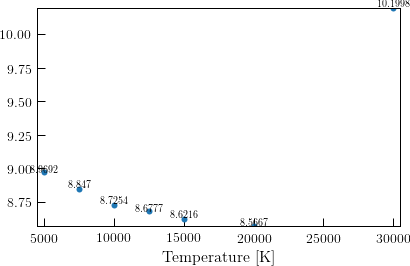

In [460]:
plt.plot(grid_temp, test, 'o')
for i in range(grid_temp.size):
    plt.text(grid_temp[i], test[i], s=str(round(test[i],4)), horizontalalignment='center')
plt.xlim(4500, 30500)
plt.xlabel('Temperature [K]')
#plt.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/alpha_to_emis_hbeta.pdf')
plt.show()

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


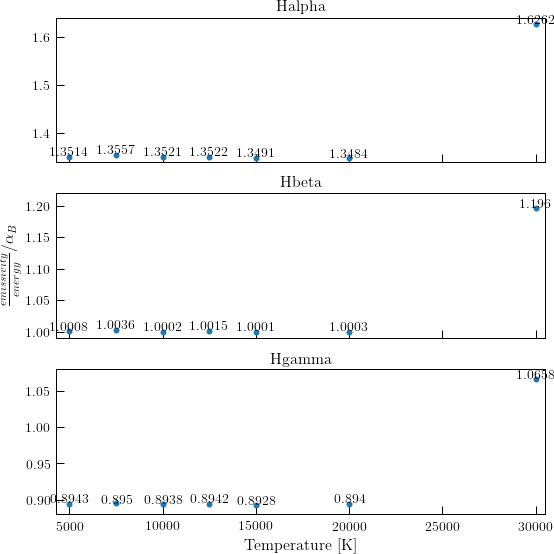

In [474]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,8), sharex=True)

ax1.plot(grid_temp, Ha_ratio, 'o')
for i in range(grid_temp.size):
    ax1.text(grid_temp[i], Ha_ratio[i], s=str(round(Ha_ratio[i],4)), horizontalalignment='center', fontsize=14)
ax1.set_xlim(4300, 30500)
ax1.set_ylim(1.34, 1.64)
ax1.set_title('Halpha')

ax2.plot(grid_temp, Hb_ratio, 'o')
for i in range(grid_temp.size):
    ax2.text(grid_temp[i], Hb_ratio[i], s=str(round(Hb_ratio[i],4)), horizontalalignment='center', fontsize=14)
ax2.set_xlim(4300, 30500)
ax2.set_ylim(0.99, 1.22)
ax2.set_title('Hbeta')
ax2.set_ylabel(r'$\frac{emissivity}{energy}/\alpha_{B}$')

ax3.plot(grid_temp, Hg_ratio, 'o')
for i in range(grid_temp.size):
    ax3.text(grid_temp[i], Hg_ratio[i], s=str(round(Hg_ratio[i],4)), horizontalalignment='center', fontsize=14)
ax3.set_xlim(4300, 30500)
ax3.set_ylim(0.88, 1.08)
ax3.set_title('Hgamma')
ax3.set_xlabel('Temperature [K]')

#f.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/alpha_to_emis.pdf')

f.show()